In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pet_supplies = pd.read_csv('/kaggle/input/pet-supplies/pet_supplies_2212.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(len(pet_supplies['product_id'].value_counts()))

pet_supplies = pet_supplies.replace(to_replace='-', value='Unknown')
print(pet_supplies['category'].value_counts())

print(pet_supplies['animal'].value_counts())

pet_supplies['size'] = pet_supplies['size'].str.lower()
print(pet_supplies['size'].value_counts())

pet_supplies['price'] = pet_supplies['price'].replace('unlisted', np.nan)
pet_supplies['price'] = pet_supplies['price'].fillna(pet_supplies['price'].median())
pet_supplies['price'] = pet_supplies['price'].astype(float).round(2)
# pet_supplies['price'] = round(pet_supplies['price'].fillna(pet_supplies.groupby('size')['price'].transform('mean')),2)

print(pet_supplies[pet_supplies['sales'] < 0])
pet_supplies['sales'] = pet_supplies['sales'].round(2)

pet_supplies['rating'] = pet_supplies['rating'].replace(np.nan, 0)

print(len(pet_supplies['repeat_purchase'].isin([0,1])))

1500
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
small     754
medium    492
large     254
Name: size, dtype: int64
Empty DataFrame
Columns: [product_id, category, animal, size, price, sales, rating, repeat_purchase]
Index: []
1500


PetMind is a company that sells a variety of pet supplies from luxury to everyday items. The company is interested in increasing sales by reselling everyday products, like food, more often. After collecting data for a year, they want to know how repeat purchases impact sales.

Task 1:

Before we can investigate, it is necessary to clean the data. 
Per the description table, the following was changed or identified:
- The original data has 1500 rows and 8 columns. 
- There are no duplicates in the product ID column, which is expected since this is a unique identifier.
- The category column has 7 unique values. The seventh category value was '-' which is seen as a missing value. The missing values were replaced with 'Unknown'.
- There are only 4 animal species, as expected. 
- The size column entries were changed to lower case and counted to confirm that there are 3 categories as expected. 
- There were 150 price entries called 'unlisted', which is seen as missing values. These values were replaced by the overall median price of $28.06.
- The sales column entries are all positive values rounded to 2. 
- There were 150 missing values in the rating column. These values were replaced with 0. All other values fall in the range of 1 to 10.
- The repeat purchase column has only 1 or 0 as an entry with no missing values.

Task 2:

Since the company is interested in repeat purchases, we can evaluate how the repeat purchases compare to the once-off purchases. In the graph below we can see that there are at least 200 more repeat purchase products than once-off purchase products. This suggests that the company already sells a large amount of its products repeatedly, but it does not give insight into the categories these products fall under or how they affect sales. 

In [3]:
pet_supplies.groupby('repeat_purchase')['product_id'].count()

repeat_purchase
0    594
1    906
Name: product_id, dtype: int64

Text(0.5, 1.0, 'Number of once-off vs repeat purchases')

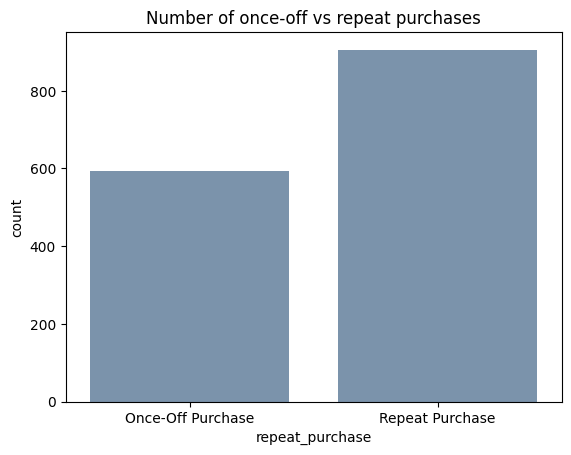

In [4]:
plot = sns.countplot(data=pet_supplies, x='repeat_purchase', color='#7393B3')
plot.set_xticklabels(['Once-Off Purchase', 'Repeat Purchase'])
plt.title('Number of once-off vs repeat purchases')

Splitting the purchases by category, shows us that equipment has the larges number of products available as well as the largest number of repeat purchases. Food, housing, medication and toys come fairly close together in second. Understanding which specific equipment products are being resold, will give PetMind a clearer picture of the daily needs of their customers. 

Text(0.5, 1.0, 'Repeat vs non-repeat purchases for each category')

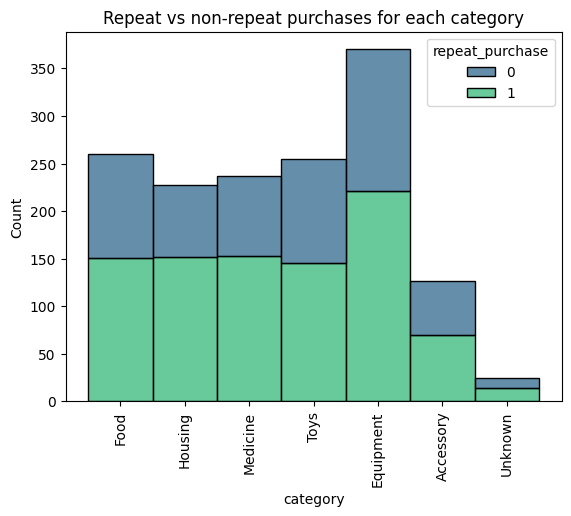

In [5]:
sns.histplot(data=pet_supplies, x='category', hue='repeat_purchase', palette='viridis', multiple='stack')
plt.xticks(rotation=90)
plt.title('Repeat vs non-repeat purchases for each category')

Task 3:

The distribution of the sales gives an idea of how often items were purchased throughout the year. The median value for the sales is 1,000 which means that most products were sold about 1,000 times. I would suggest to investigate which products fall in the outliers section of the graph, to try and understand why they were sold more than others (was it species, price, or category that caused the higher sale value). 

Text(0.5, 1.0, 'Distribution of sales')

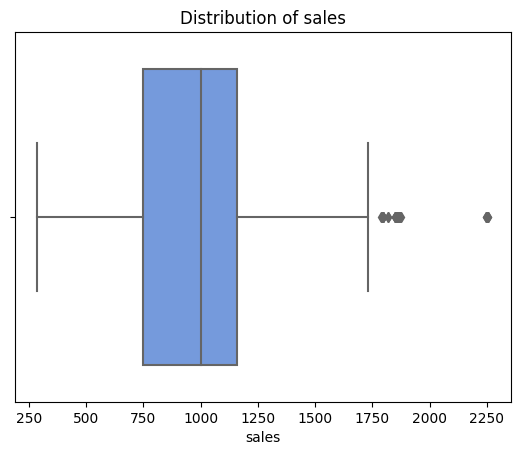

In [6]:
sns.boxplot(data=pet_supplies, x='sales', color='#6495ED')
plt.title('Distribution of sales')

We can split the sales by animal species to get a clearer picture of what type of pet owners the company caters to most. For this graph, we removed any sales above 1,500 to show the detail better. Below we can see that the products for cats are very popular. This suggests that the company offers high quality cat products that cat owners prefer above other companies. This can be a starting point for the marketing team to look at.

Text(0.5, 1.0, 'Distribution of sales by animal type')

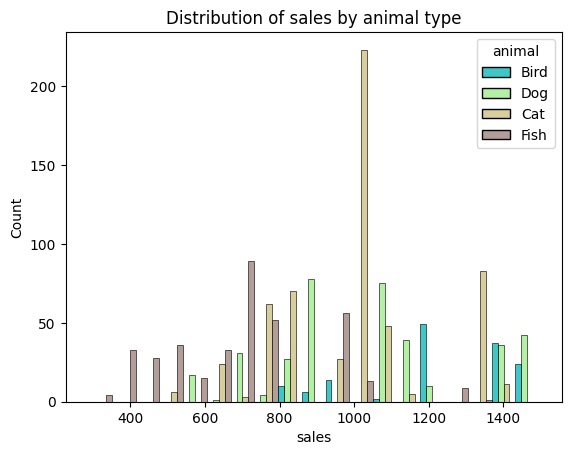

In [7]:
no_outliers = pet_supplies[pet_supplies['sales'] < 1500]
sns.histplot(data=no_outliers, x='sales', hue='animal', multiple='dodge', palette='terrain')
plt.title('Distribution of sales by animal type')

Task 4:

You could also look at how the sales are split by category, but since the company is interested in how repeat purchases affect sales, it makes more sense to look at the sales distribution between once-off and repeat purchases. In the plot below we can see that the median for both categories is close together, and the interquartile ranges are fairly similar. This suggests that repeat purchases don't have a strong influence over sales compared to non-repeat purchases, even though, as presented in our first graph, there are more repeat purchase products than once-off purchase products. This could be due to lower prices for the repeat purchase products. 

Text(0.5, 1.0, 'Distribution of sales for repeat and no-repeat purchases')

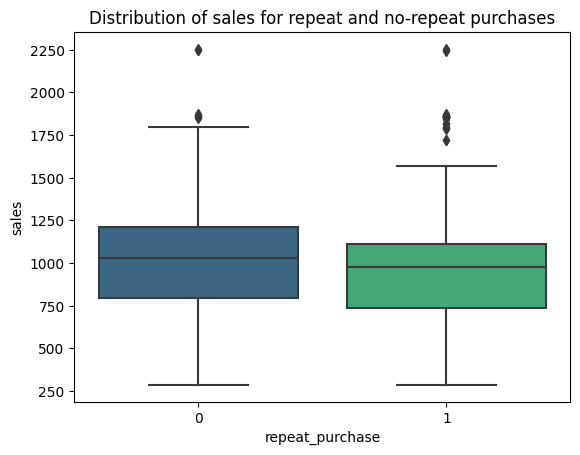

In [8]:
sns.boxplot(data=pet_supplies, x='repeat_purchase', y='sales', palette='viridis')
plt.title('Distribution of sales for repeat and no-repeat purchases')

Lastly, we look at how the sales are affected by price. Disregarding the straight line of bubbles at $28.60, which is our median price that was used to fill in missing values, we can see that higher prices tend to have larger number of sales. However, when we split the prices by animal species we can see that the species drives the increase in sales and not the price. This also shows that fish products tend to have lower prices compared to birds and that most dog and cat product prices fall in the middle.

Text(0.5, 1.0, 'Relationship between sales and prices')

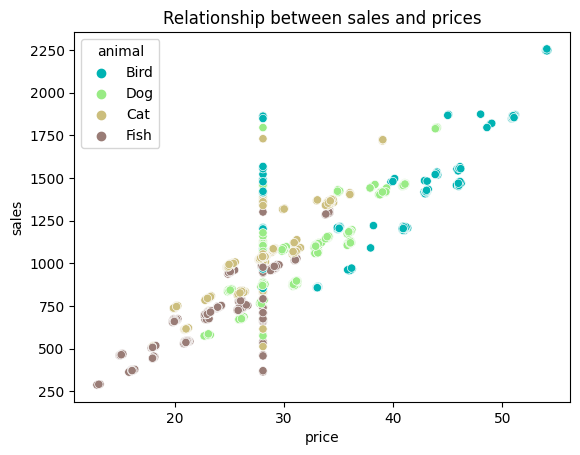

In [9]:
sns.scatterplot(data=pet_supplies, x='price', y='sales', hue='animal', palette='terrain')
plt.title('Relationship between sales and prices')

Based on the information above, repeat purchases do not affect the sales in a significant way. Identifying which items were repeat purchases would give a more accurate idea of why, but based on the information we have, it makes sense that everyday items like food and equipment is only repurchased a certain number of times in a year. Animals tend to eat a number of portions a day and that number rarely increases once an animal reaches adulthood. I would recommend that PetMind focus on using their popular items to attract more pet owners in order to increase sales. Attracting pet owners with younger pets might increase repeat purchases, on things like food, for the first couple years of the pet's life. 